# Quantum Gates and Control: From Hermitian Matrices to Control Pulses

This notebook covers:

- Hermitian and Unitary matrices
- Pauli matrices
- Matrix exponentiation and rotations
- Lie algebra ↔ Lie group connection
- Quantum control using pulses

So far, we’ve explored the basic building blocks of quantum computing: quantum gates like the Hadamard and CNOT, simple quantum circuits, and how measurement collapses quantum states. In this notebook, we’ll dive deeper into the mathematical structure that underlies these gates and learn how we can generate them from physical principles like Hamiltonians and control pulses.

We'll start with the Pauli matrices, which play a central role in quantum computing. These compact $2\times 2$ matrices not only represent basic quantum gates (like the X, Y, and Z gates), but also serve as a complete basis for any operation on a single qubit. Think of them as the "$XYZ$ axes" for qubit dynamics on the Bloch sphere.

Next, we’ll review two key classes of matrices: Hermitian matrices, which correspond to physical observables and quantum Hamiltonians, and unitary matrices, which describe all valid quantum evolutions. Understanding how these two types are connected through matrix exponentiation will give us insight into how quantum gates arise from physical interactions.

Along the way, we’ll introduce a beautiful idea from mathematics: the relationship between Lie algebras and Lie groups. This might sound fancy, but it's actually a very natural way to describe how quantum operations "grow out of" the generators like the Pauli matrices.

Finally, we’ll connect theory to practice by looking at quantum control. Specifically, we’ll learn how applying time-varying control pulses to a qubit allows us to implement gates like $X, Y, Z$ gates and arbitrary rotations. This is how real quantum computers—especially those built from superconducting qubits or trapped ions—actually work under the hood.

By the end of this notebook, you'll see how math and physics come together to shape the circuits you've already been working with—and you'll gain a new appreciation for what it really means to rotate a qubit.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm, eig, norm
np.set_printoptions(precision=3, suppress=True)

## 1. Pauli Matrices

In [2]:
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

paulis = {'I': I, 'X': X, 'Y': Y, 'Z': Z}
for name, mat in paulis.items():
    print(f"{name} Matrix:\n{mat}\n")

I Matrix:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

X Matrix:
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Y Matrix:
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

Z Matrix:
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]



## 2. Hermitian and Unitary Matrices


In linear algebra and quantum mechanics, two important classes of complex square matrices are **Hermitian** and **Unitary** matrices.

---

#### 🟩 Hermitian Matrix

A matrix $A \in \mathbb{C}^{n \times n}$ is called **Hermitian** if it is equal to its own conjugate transpose:

$$
A^\dagger = A
$$

This means that for all $i, j$:

$$
A_{ij} = \overline{A_{ji}}
$$

Properties:
- Hermitian matrices have **real eigenvalues**.
- Hermitian matrices represent **observables** in quantum mechanics (e.g., energy, position, spin).

---

#### 🟦 Unitary Matrix

A matrix $U \in \mathbb{C}^{n \times n}$ is called **Unitary** if its conjugate transpose is its inverse:

$$
U^\dagger U = U U^\dagger = I
$$

This implies:

$$
U^\dagger = U^{-1}
$$

Properties:
- Unitary matrices preserve inner products and norms.
- They represent **reversible quantum evolutions** and **quantum gates** in quantum computing.

---

#### 🧠 Summary

| Matrix Type | Defining Equation       | Key Role in Quantum Mechanics         |
|-------------|--------------------------|----------------------------------------|
| Hermitian   | $A^\dagger = A$      | Observables (e.g., Hamiltonians)       |
| Unitary     | $U^\dagger = U^{-1}$ | Reversible evolution (quantum gates)   |


In [4]:
def is_hermitian(H):
    return np.allclose(H, H.conj().T)

def is_unitary(U):
    return np.allclose(U @ U.conj().T, np.eye(U.shape[0]))

print("X is Hermitian:", is_hermitian(X))
print("X is Unitary:", is_unitary(X))
print("Y is Hermitian:", is_hermitian(Y))
print("Y is Unitary:", is_unitary(Y))
print("Z is Hermitian:", is_hermitian(Z))
print("Z is Unitary:", is_unitary(Z))

print("exp(-iZθ) is Unitary:", is_unitary(expm(-1j * np.pi/4 * Z)))

X is Hermitian: True
X is Unitary: True
Y is Hermitian: True
Y is Unitary: True
Z is Hermitian: True
Z is Unitary: True
exp(-iZθ) is Unitary: True


## 3. Matrix Exponentiation and Rotations


Matrix exponentiation extends the exponential function to square matrices.  
Given a square matrix $A \in \mathbb{C}^{n \times n}$, the **matrix exponential** $e^A$ is defined by the power series:

$$
e^A = \sum_{k=0}^{\infty} \frac{A^k}{k!}
= I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \frac{A^4}{4!} + \cdots
$$

where:
- $A^0 = I$ is the identity matrix,
- $A^k$ is the $k$-th power of matrix $A$,
- the series converges for all finite matrices $A$.

---

#### 🧠 Interpretation and Uses

- If $A$ is **diagonalizable**, computing $e^A$ reduces to exponentiating its eigenvalues.
- If $A$ is **skew-Hermitian** (i.e., $A^\dagger = -A$), then $e^A$ is **unitary**.
- In quantum mechanics, the **time evolution operator** is:

$$
U(t) = e^{-iHt/\hbar}
$$

where $H$ is the system’s Hamiltonian.

---

#### 🔢 Example

Let

$$
A = \begin{bmatrix} 0 & -\theta \\ \theta & 0 \end{bmatrix}
$$

Then:

$$
e^A = \cos \theta \cdot I + \sin \theta \cdot \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}
$$

This is a **rotation matrix**, which appears frequently in quantum mechanics, robotics, and Lie group theory.


In [5]:
theta = np.pi / 2
Rx = expm(-1j * theta/2 * X)
Ry = expm(-1j * theta/2 * Y)
Rz = expm(-1j * theta/2 * Z)

print("Rx(π/2):\n", Rx)

Rx(π/2):
 [[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]


### Nilpotent Matrices

A square matrix $A \in \mathbb{C}^{n \times n}$ is called **nilpotent** if there exists a positive integer $k$ such that:

$$
A^k = 0
$$

where $0$ is the zero matrix. The smallest such $k$ is called the **index** of nilpotency.

---

#### 🧪 Examples

1. A $2 \times 2$ nilpotent matrix:

$$
A = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}, \quad A^2 = \begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix}
$$

2. A $3 \times 3$ nilpotent matrix with index 3:

$$
B = \begin{bmatrix} 0 & 1 & 0 \\
                    0 & 0 & 1 \\
                    0 & 0 & 0 \end{bmatrix}, \quad
B^2 = \begin{bmatrix} 0 & 0 & 1 \\
                      0 & 0 & 0 \\
                      0 & 0 & 0 \end{bmatrix}, \quad
B^3 = 0
$$

3. A non-trivial nilpotent matrix with non-zero entries off the main superdiagonal:

$$
C = \begin{bmatrix} 0 & 2 & -1 \\
                    0 & 0 & 3 \\
                    0 & 0 & 0 \end{bmatrix}, \quad C^3 = 0
$$

---

#### 🧠 Notes

- All **strictly upper triangular matrices** (i.e. all zeros on and below the diagonal) are nilpotent.
- Nilpotent matrices are always **non-invertible**.
- In Jordan form, nilpotent matrices consist only of **zero eigenvalues**.


### Computing Matrix Exponentials in Python

In Python, the matrix exponential $e^A$ for a square matrix $A$ is computed using:

```python
from scipy.linalg import expm
```

The expm function is part of SciPy’s linalg module and implements a robust algorithm based on:

- Scaling and squaring: the input matrix is scaled down to reduce its norm,

- Padé approximation: a rational function is used to approximate the exponential,

- followed by repeated squaring to rescale the result.

This method is accurate and efficient, and is commonly used in physics, control theory, and quantum computing to compute expressions like $e^{-iHt}$ for time evolution under a Hamiltonian $H$.

### Matrix Exponentials Do Not Generally Commute

In general, **matrix exponentiation is not multiplicative**:

$$
e^A e^B \ne e^{A+B}
$$

unless the matrices $A$ and $B$ **commute**, meaning:

$$
AB = BA
$$

---

#### 🚫 Non-Commutativity in Practice

If $A$ and $B$ do **not commute**, then:

$$
e^A e^B \ne e^{A+B}, \quad \text{and} \quad e^A e^B \ne e^B e^A
$$

This is a fundamental difference from scalar exponentiation, where exponentials always commute. The failure of this identity stems from how matrix multiplication mixes terms when $AB \ne BA$.

---

#### 🧮 Baker–Campbell–Hausdorff Formula

To account for non-commutativity, we use the **Baker–Campbell–Hausdorff (BCH) formula**, which expresses:

$$
e^A e^B = e^C
$$

where $C$ is not simply $A + B$, but involves **nested commutators**:

$$
C = A + B + \tfrac{1}{2}[A, B] + \tfrac{1}{12}[A,[A,B]] - \tfrac{1}{12}[B,[A,B]] + \cdots
$$

Here $[A, B] = AB - BA$ is the **matrix commutator**.

---

#### ⚛️ Why This Matters in Quantum Mechanics

In quantum physics, **non-commuting observables** (like position and momentum, or spin components) lead to **non-commuting time evolution operators**:

- Time evolution over two intervals with different Hamiltonians generally **depends on the order**.
- Sequential quantum gates may not combine cleanly as one exponential.

This reflects the **non-classical behavior** of quantum systems, where operator order matters — a signature of **quantum uncertainty and interference**.

---

#### 🧠 Summary

| Property | Holds if |
|---------|-----------|
| $e^A e^B = e^{A+B}$ | Only if $AB = BA$ |
| $e^A e^B = e^B e^A$ | Only if $A$ and $B$ commute |
| Quantum implications | Evolution is **order-dependent** for non-commuting Hamiltonians |


### Matrix Exponential via Limit — Intuition from the BCH Formula

An important identity in matrix analysis is:

$$
\lim_{n \to \infty} \left(e^{X/n}\right)^n = e^X
$$

This holds for any square matrix $X$ (real or complex), and provides a **constructive, limit-based definition** of the matrix exponential.

---

#### 🧠 Intuition via Baker–Campbell–Hausdorff (BCH) Formula

In general, matrix exponentials don't multiply like scalars: $e^A e^B \ne e^{A+B}$ unless $[A, B] = 0$.  
However, the **BCH formula** gives a controlled expansion:

$$
\log(e^A e^B) = A + B + \tfrac{1}{2}[A, B] + \cdots
$$

This tells us how non-commutativity contributes to the difference between $e^A e^B$ and $e^{A+B}$.

---

#### 🔁 Now Apply to the Limit

Let’s write:

$$
\left(e^{X/n}\right)^n = e^{X/n} e^{X/n} \cdots e^{X/n} \quad (n \text{ times})
$$

Each pair $e^{X/n} e^{X/n}$ introduces **commutator errors**, but these errors are of order:

$$
\left[\tfrac{X}{n}, \tfrac{X}{n}\right] = \tfrac{1}{n^2}[X, X] = 0
$$

and higher-order nested commutators decay even faster — like $1/n^2$, $1/n^3$, etc.

So as $n \to \infty$, all the **non-commutativity terms vanish**, and the product behaves like:

$$
\left(e^{X/n}\right)^n \to e^{X}
$$

This aligns with the **Lie algebra → Lie group** principle: breaking an exponential into many small steps approaches the continuous transformation.

---

#### ⚛️ Physical Interpretation

In quantum physics, this tells us that repeated application of a small unitary evolution operator (e.g., $e^{-iH \Delta t}$) approximates the full evolution:

$$
e^{-iHt} = \lim_{n \to \infty} \left(e^{-iH t/n}\right)^n
$$

This is the basis of **Trotterization** in quantum simulation and **splitting methods** in numerical integration.

---

#### ✅ Summary

| Concept | Insight |
|--------|---------|
| $\left(e^{X/n}\right)^n \to e^X$ | Limit of small steps converges to global evolution |
| BCH Formula | Explains how commutators vanish as $n \to \infty$ |
| Application | Used in Lie theory, quantum evolution, and simulation |


## Theorem: The Matrix Exponential of a Hermitian Matrix (with Imaginary Prefactor) is Unitary

Let $H \in \mathbb{C}^{n \times n}$ be a **Hermitian matrix**, i.e., $H^\dagger = H$.  
Then the matrix exponential of $-iH$ is **unitary**:

$$
U = e^{-iH} \quad \Rightarrow \quad U^\dagger U = I
$$

---

#### 🧩 Proof Sketch

Let $H = H^\dagger$ be Hermitian. Consider:

$$
U = e^{-iH}, \quad U^\dagger = (e^{-iH})^\dagger = e^{iH}
$$

Then:

$$
U^\dagger U = e^{iH} e^{-iH} = e^{iH - iH} = e^0 = I
$$

Hence, $U$ is unitary.

---

#### 🔬 Spectral Interpretation

If $H$ is diagonalizable (which all Hermitian matrices are), then:

$$
H = V D V^\dagger, \quad \text{where } D \text{ is real diagonal},\ V \text{ unitary}
$$

Then:

$$
e^{-iH} = V e^{-iD} V^\dagger
$$

Since $e^{-iD}$ is diagonal with unimodular complex entries (i.e., $e^{-i\lambda_j}$ on the unit circle), the result is unitary.

---

#### ✅ Summary

| Given | Result |
|-------|--------|
| $H$ Hermitian | $e^{-iH}$ is unitary |
| $U = e^{-iHt/\hbar}$ | Time evolution operator in quantum mechanics |
| Implication | Norm-preserving, reversible evolution |


### Schrödinger’s Equation and Matrix Exponentiation (Time-Independent Case)

In quantum mechanics, the **time evolution** of a quantum state $|\psi(t)\rangle$ is governed by the **time-dependent Schrödinger equation**:

$$
i\hbar \frac{d}{dt} |\psi(t)\rangle = H |\psi(t)\rangle
$$

where:
- $|\psi(t)\rangle$ is the quantum state at time $t$,
- $H$ is the **Hamiltonian**, a Hermitian matrix or operator representing the system’s total energy,
- $\hbar$ is the reduced Planck constant.

---

#### 🧮 Time-Independent Case and Integral Form

If the Hamiltonian $H$ is **time-independent**, the Schrödinger equation can be integrated directly. The solution takes the form:

$$
|\psi(t)\rangle = e^{-iHt/\hbar} |\psi(0)\rangle
$$

This is called the **integral form** of the Schrödinger equation. Here:

- $e^{-iHt/\hbar}$ is the **matrix exponential** of the scaled Hamiltonian,
- It defines a **unitary operator** that evolves the initial state $|\psi(0)\rangle$ forward in time.

---

#### 🧠 Why This Matters

- The exponential form is the exact solution to the differential equation when $H$ is constant.
- It ensures **unitarity**, meaning the total probability (norm of the state) is conserved.
- The matrix exponential bridges **quantum mechanics**, **linear algebra**, and **Lie group theory**, as $-iH$ lies in the Lie algebra $\mathfrak{u}(n)$ and $e^{-iHt/\hbar}$ lies in the unitary group $U(n)$.

This exponential form of time evolution is foundational in quantum physics, quantum computing, and simulation of physical systems.


### Hermitian Matrices, Lie Algebras, and Lie Groups

The relationship between Hermitian matrices and unitary matrices can be naturally understood through the lens of **Lie theory** — the study of continuous symmetries.

---

#### 🔷 Lie Groups and Lie Algebras

- The set of all $n \times n$ **unitary matrices** forms a **Lie group**, denoted $U(n)$:
  
  $$
  U(n) = \{ U \in \mathbb{C}^{n \times n} \mid U^\dagger U = I \}
  $$

- The corresponding **Lie algebra** of $U(n)$ is denoted $\mathfrak{u}(n)$, consisting of all **skew-Hermitian** matrices:

  $$
  \mathfrak{u}(n) = \{ X \in \mathbb{C}^{n \times n} \mid X^\dagger = -X \}
  $$

- The exponential map connects them:

  $$
  \exp : \mathfrak{u}(n) \to U(n), \quad \exp(X) = \sum_{k=0}^\infty \frac{X^k}{k!}
  $$

This map takes elements from the Lie algebra (infinitesimal generators) to the Lie group (finite symmetry transformations).

---

#### 🧠 Summary

| Concept | Object |
|--------|--------|
| Lie group of unitary matrices | $U(n)$ |
| Lie algebra of $U(n)$ | $\mathfrak{u}(n)$ (skew-Hermitian matrices) |
| Hermitian $H$ → $-iH \in \mathfrak{u}(n)$ | Generator of unitary evolution |
| Exponential map | $e^{-iH} \in U(n)$ |

This framework is fundamental in quantum mechanics, where Hermitian observables generate time evolution, symmetry transformations, and quantum gates through the exponential map.


## I have quantum device with 1 qubit

I want to describe my 1-qubit quantum computer, the Hamiltonian is:
$$ H = X$$ 

(assume we can also prepare a |0> on my qubit, we can also measure it)


Next question is:  what can it do?

The potential quantum gate that I can do follows the Schrodinger's equation,
$$ U = e^{-i H t} =  e^{-i Xt }$$

$t$ is the time.

The qubit Hamiltonian can be turned on or off. $t=0$, turn it on, $t=T$ turn it off. When turn it off:
$$H=I$$

After calculating the matrix exponential:
$$
U =e^{- i t X} = \cos\left(t\right) I - i \sin\left(t\right) X 
$$

If $t=\frac{\pi}{2}, U =X$, 

for $\sigma \in \{X, Y, Z\}$. For example:

- $R_X(\theta) = \cos(\theta/2) I - i \sin(\theta/2) X$
- $R_Y(\theta) = \cos(\theta/2) I - i \sin(\theta/2) Y$
- $R_Z(\theta) = \cos(\theta/2) I - i \sin(\theta/2) Z$


## 5. Quantum Control: 1-qubit gate and their generators

### Pauli Matrices as Generators of Single-Qubit Rotations

The Pauli matrices are fundamental Hermitian operators acting on a single qubit:

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \quad
Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}, \quad
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$

Each matrix represents a **quantum observable** (e.g., spin components along the $x$, $y$, and $z$ axes), and also serves as a **generator of rotation** when exponentiated.

---

#### 🔁 Unitary Rotation from Hermitian Generator

Given a Hermitian operator $A$, the exponential $e^{-i\theta A}$ defines a **unitary operator** representing a rotation generated by $A$ with angle $\theta$.

Thus, for each Pauli matrix, the exponential defines a **rotation about that axis** on the Bloch sphere:

- Rotation about $x$-axis:
  $$
  R_X(\theta) = e^{-i \frac{\theta}{2} X}
  $$
- Rotation about $y$-axis:
  $$
  R_Y(\theta) = e^{-i \frac{\theta}{2} Y}
  $$
- Rotation about $z$-axis:
  $$
  R_Z(\theta) = e^{-i \frac{\theta}{2} Z}
  $$

The factor $\frac{\theta}{2}$ comes from the physics convention of using angular momentum generators (which are $\frac{1}{2}$ times the Pauli matrices in units where $\hbar = 1$).

---

#### 🧠 Intuition (Bloch Sphere View)

- A qubit state can be represented as a point on the **Bloch sphere**.
- The Pauli matrices generate **rotations** around the $x$, $y$, and $z$ axes.
- Applying $R_X(\theta)$ rotates the qubit **around the $x$-axis by angle $\theta$**, and similarly for $R_Y$ and $R_Z$.
- These operations preserve the norm and correspond to **unitary, reversible transformations**.

---

#### 🔬 Explicit Formulas

The exponentials of Pauli matrices can be written in closed form using:

$$
e^{-i\frac{\theta}{2} \sigma} = \cos\left(\frac{\theta}{2}\right) I - i \sin\left(\frac{\theta}{2}\right) \sigma
$$

for $\sigma \in \{X, Y, Z\}$. For example:

- $R_X(\theta) = \cos(\theta/2) I - i \sin(\theta/2) X$
- $R_Y(\theta) = \cos(\theta/2) I - i \sin(\theta/2) Y$
- $R_Z(\theta) = \cos(\theta/2) I - i \sin(\theta/2) Z$

These are unitary matrices that rotate the qubit state on the Bloch sphere.

---

#### ⚛️ Relevance in Quantum Computing

- The $R_X$, $R_Y$, and $R_Z$ gates are **universal rotation gates** for single qubits.
- Any single-qubit unitary can be decomposed into a sequence of these rotations.
- Quantum circuits use these gates to implement precise qubit manipulations.

---

#### ✅ Summary

| Generator | Rotation | Gate Notation |
|----------|----------|----------------|
| $X$      | $x$-axis | $R_X(\theta)$ |
| $Y$      | $y$-axis | $R_Y(\theta)$ |
| $Z$      | $z$-axis | $R_Z(\theta)$ |

The Pauli matrices are not just observables — they are the **Lie algebra generators** of the single-qubit unitary group $SU(2)$.


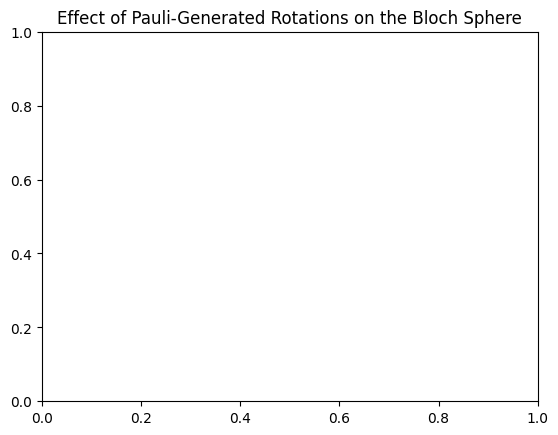

In [2]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from qutip import Bloch, Qobj, sigmax, sigmay, sigmaz, basis

# Define Pauli matrices as numpy arrays
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

# Define rotation operator: U = exp(-i θ/2 * σ)
def rotation_gate(pauli, theta):
    return expm(-1j * theta / 2 * pauli)

# Initial state: |0⟩ = [1, 0]
ket0 = np.array([[1], [0]])

# Rotate around X, Y, Z by π (180 degrees)
theta = np.pi
Rx = rotation_gate(X, theta)
Ry = rotation_gate(Y, theta)
Rz = rotation_gate(Z, theta)

# Final states after rotations
psi_x = Rx @ ket0
psi_y = Ry @ ket0
psi_z = Rz @ ket0

# Convert to Qobj for Bloch visualization
states = [
    Qobj(ket0),
    Qobj(psi_x),
    Qobj(psi_y),
    Qobj(psi_z)
]

labels = ["Initial |0⟩", "Rₓ(π)|0⟩", "Rᵧ(π)|0⟩", "R𝓏(π)|0⟩"]
colors = ['k', 'r', 'g', 'b']

# Plot on Bloch sphere
b = Bloch()
for state, label, color in zip(states, labels, colors):
    b.add_states(state)
    b.vector_color = [color]
b.add_annotation([0, 0, 1], text="|0⟩", color="gray")
b.add_annotation([0, 0, -1], text="|1⟩", color="gray")
b.render()
plt.title("Effect of Pauli-Generated Rotations on the Bloch Sphere")
plt.show()


### Arbitrary Single-Qubit Rotations and Their Generators

A general **single-qubit unitary operation** is an element of the group $SU(2)$, the set of $2 \times 2$ unitary matrices with determinant 1. These transformations correspond to **rotations of the qubit state on the Bloch sphere**.

---

#### 🔁 General Form of a Single-Qubit Rotation

Any single-qubit unitary $U \in SU(2)$ can be written as a rotation about some axis $\vec{n} = (n_x, n_y, n_z)$ on the Bloch sphere:

$$
U(\theta, \vec{n}) = e^{-i \frac{\theta}{2} (n_x X + n_y Y + n_z Z)}
$$

where:
- $\theta$ is the rotation angle,
- $\vec{n}$ is a **unit vector** in $\mathbb{R}^3$ (i.e., $|\vec{n}| = 1$),
- $X, Y, Z$ are the Pauli matrices.

This exponential form shows that arbitrary single-qubit rotations are generated by **linear combinations of Pauli matrices** — the generators of the Lie algebra $\mathfrak{su}(2)$.

---

#### 🔬 Bloch Sphere Interpretation

- The qubit state can be visualized as a point on the Bloch sphere.
- The unitary $U(\theta, \vec{n})$ rotates the state about axis $\vec{n}$ by angle $\theta$.
- Since the state vector evolves by a unitary, the qubit’s norm and global phase are preserved.

---

#### 🧱 Gate Decomposition

Any such unitary can be decomposed into **elementary rotations** around the $Z$ and $Y$ (or $X$) axes:

$$
U = R_Z(\alpha) R_Y(\beta) R_Z(\gamma)
$$

or equivalently:

$$
U = R_Z(\phi) R_X(\theta) R_Z(\lambda)
$$

These decompositions (known as **ZYZ** or **ZXZ Euler decompositions**) are essential in quantum circuit design, where only discrete sets of gates are implemented physically.

---

#### 🧠 Summary

- Arbitrary single-qubit rotations are unitary matrices in $SU(2)$.
- They are generated via exponentials of Pauli matrices: $e^{-i\theta\, \vec{n} \cdot \vec{\sigma} / 2}$.
- Any such unitary can be decomposed into 3 basic rotations: $R_Z$, $R_Y$, and $R_Z$.
- This framework underlies how quantum gates control single-qubit dynamics.

---

#### ⚛️ In Quantum Circuits

| Gate       | Rotation Axis | Generator     | Matrix Form                   |
|------------|----------------|----------------|--------------------------------|
| $R_X(\theta)$ | $x$-axis     | $X$            | $\cos(\theta/2)I - i\sin(\theta/2)X$ |
| $R_Y(\theta)$ | $y$-axis     | $Y$            | $\cos(\theta/2)I - i\sin(\theta/2)Y$ |
| $R_Z(\theta)$ | $z$-axis     | $Z$            | $\cos(\theta/2)I - i\sin(\theta/2)Z$ |

These three generators span all possible qubit rotations — they form a **basis of the Lie algebra** $\mathfrak{su}(2)$.


In [ ]:
def H_control(t, Omega, delta):
    return 0.5 * Omega * np.cos(delta * t) * X

In [ ]:
def simulate_gate(H_func, t_span, dt=0.01):
    U = np.eye(2, dtype=complex)
    for t in np.arange(0, t_span, dt):
        H = H_func(t)
        U = expm(-1j * H * dt) @ U
    return U

Omega = np.pi
delta = 0
U_gate = simulate_gate(lambda t: H_control(t, Omega, delta), 1.0)
print("Effective gate:\n", U_gate)

## Summary

| Concept       | Role                             |
|---------------|----------------------------------|
| Pauli         | Qubit operators basis             |
| Hermitian     | Observables, generators of $U(t)$ |
| Unitary       | Time evolution and gates          |
| Exp(H)        | Connects Lie algebra to group     |
| Pulses        | Drive quantum gates physically    |